 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [354]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

C:\Users\aelri\Desktop\Pandas\Resources# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [355]:
# Reading whale returns
whale_returns= r"C:\Users\aelri\Desktop\Pandas\Pandas-Whale-Analysis\Resources\whale_returns.csv"
whale_returnsdf= pd.read_csv(whale_returns,index_col= "Date", infer_datetime_format=True, parse_dates=True)
whale_returnsdf.sort_index(inplace=True)
whale_returnsdf.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [356]:
# Count nulls
whale_returnsdf.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [357]:
# Drop nulls
whale_returnsdf.dropna(inplace=True)
whale_returnsdf.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [358]:
# Reading algorithmic returns
algo_returns = r"C:\Users\aelri\Desktop\Pandas\Pandas-Whale-Analysis\Resources\algo_returns.csv"
algo_returnsdf= pd.read_csv(algo_returns,index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returnsdf.sort_index(inplace=True)
algo_returnsdf.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [359]:
# Count nulls
algo_returnsdf.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [360]:
# Drop nulls
algo_returnsdf.dropna(inplace=True)
algo_returnsdf

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [361]:
# Reading S&P 500 Closing Prices
sp500_history = r"C:\Users\aelri\Desktop\Pandas\Pandas-Whale-Analysis\Resources\sp500_history.csv"
sp500_df= pd.read_csv(sp500_history,index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [362]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [363]:
# Fix Data Types
sp500_df["Close"]=sp500_df["Close"].str.replace('$','').astype("float")
sp500_df.sort_index(inplace=True)
sp500_df.dtypes

Close    float64
dtype: object

In [364]:
# Calculate Daily Returns
sp500daily=sp500_df.pct_change()
sp500daily.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [365]:
# Drop nulls
sp500daily.dropna(inplace=True)
sp500daily.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [366]:
# Rename `Close` Column to be specific to this portfolio.
sp500daily.rename(columns={"Close":"S&P500"},inplace=True)
sp500daily.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [367]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns
portfolio=pd.concat([whale_returnsdf,algo_returnsdf,sp500daily],axis="columns",join="inner")
portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

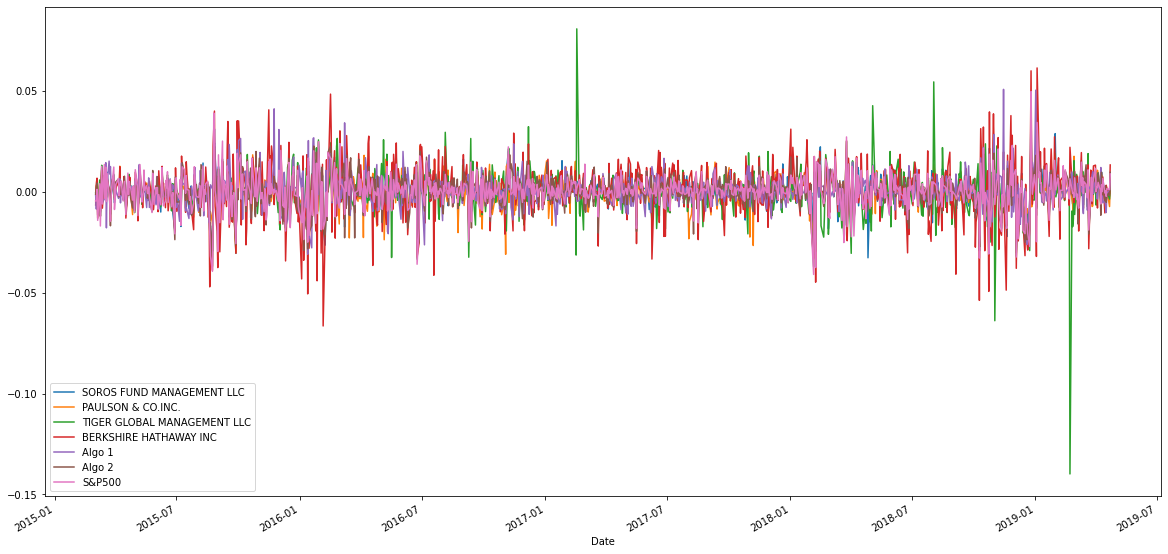

In [368]:
# Plot daily returns of all portfolios
portfolio.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

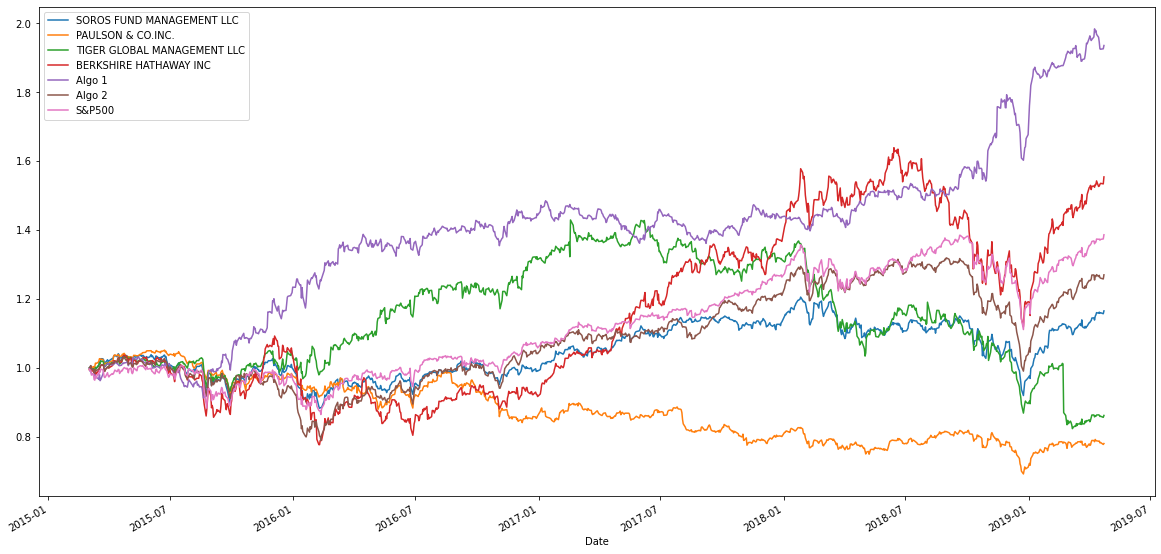

In [369]:
# Calculate cumulative returns of all portfolios
Cum_returns=(1+portfolio).cumprod()
# Plot cumulative returns
Cum_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

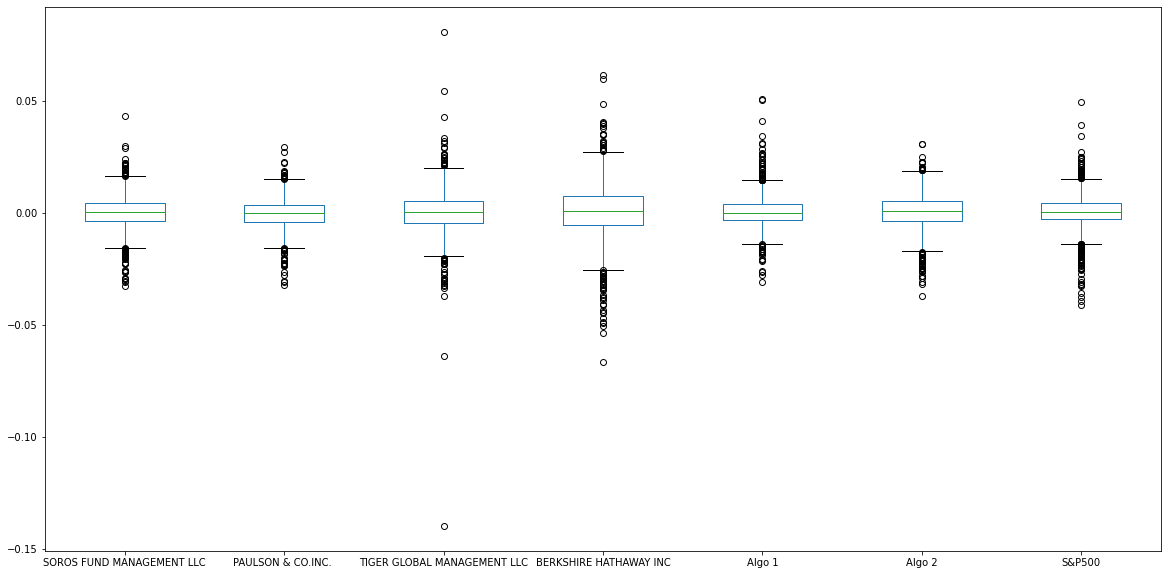

In [370]:
# Box plot to visually show risk
portfolio.plot(kind="box",figsize=(20,10))

### Calculate Standard Deviations

In [371]:
# Calculate the daily standard deviations of all portfolios
portfolio_std=pd.DataFrame(portfolio.std())
portfolio_std.rename(columns={0:"std"},inplace=True)
portfolio_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [372]:
# Determine which portfolios are riskier than the S&P 500
portfolio_std
riskier = portfolio_std[portfolio_std["std"] > portfolio_std.loc["S&P500","std"]]
print(riskier)

                                  std
TIGER GLOBAL MANAGEMENT LLC  0.010894
BERKSHIRE HATHAWAY INC       0.012919


### Calculate the Annualized Standard Deviation

In [373]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std=portfolio_std*np.sqrt(252)
annualised_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P500,0.135786


## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

---

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

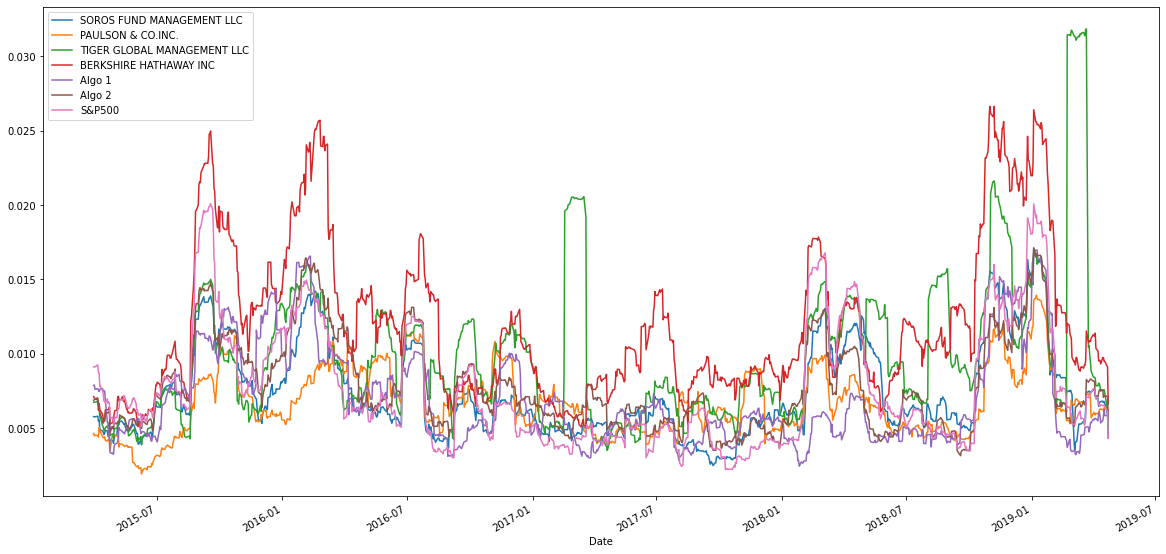

In [374]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = portfolio.rolling(window = 21).std()
rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

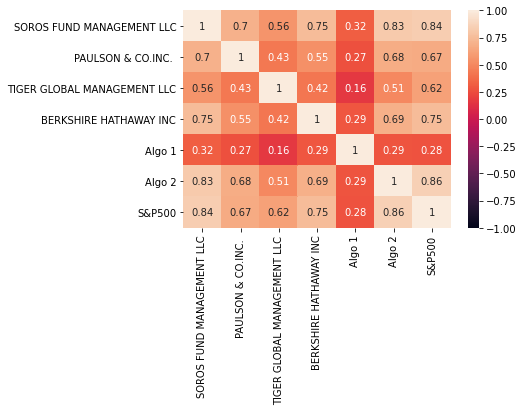

In [375]:
# Calculate the correlation
correlation=portfolio.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation,vmin=-1, vmax=1,annot=True,)

In [376]:
#corrrelation output:
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [377]:
# Calculate covariance of a single portfolio
covariance=portfolio['PAULSON & CO.INC. '].cov(portfolio["S&P500"])
covariance

4.0233150936527355e-05

<AxesSubplot:xlabel='S&P500', ylabel='PAULSON & CO.INC. '>

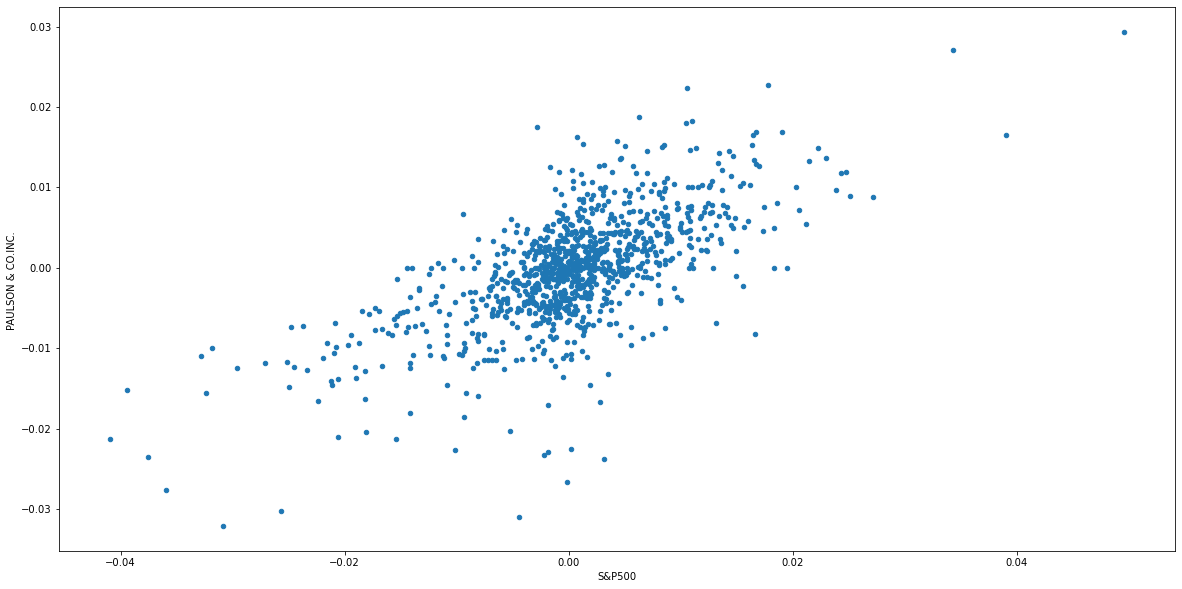

In [378]:
portfolio.plot(kind="scatter", y = 'PAULSON & CO.INC. ', x = "S&P500", figsize = (20,10))

In [379]:
# Calculate variance of S&P 500
variance=portfolio["S&P500"].var()
variance

7.316632424648712e-05

In [380]:
# Computing beta
algo2_beta=covariance/variance
algo2_beta

0.5498861853574534

<AxesSubplot:xlabel='Date'>

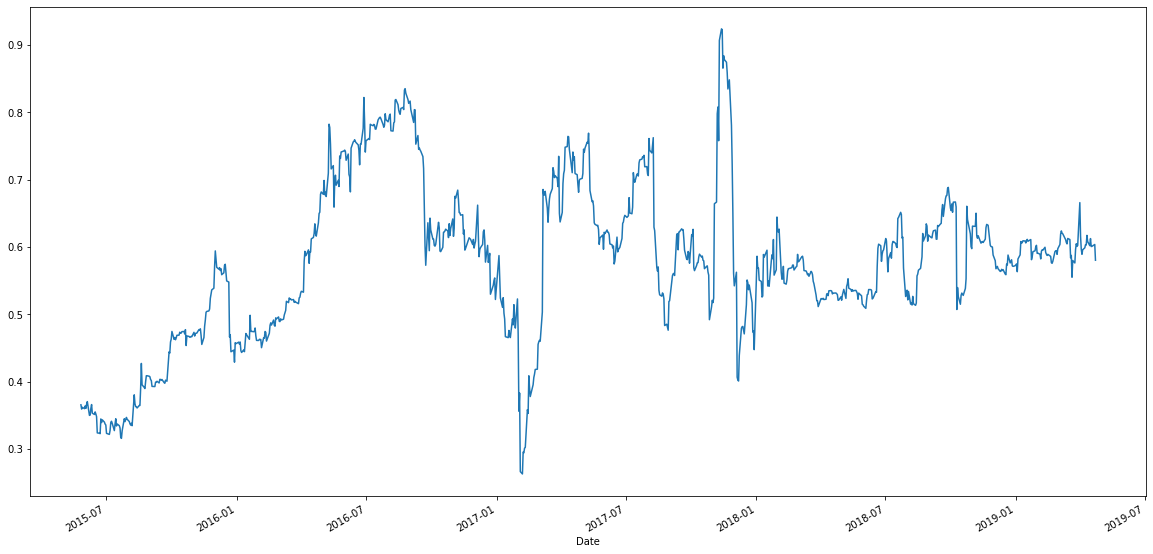

In [381]:
# Plot beta trend
rolling_covariance = portfolio['PAULSON & CO.INC. '].rolling(window=60).cov(portfolio['S&P500'])
rolling_variance = portfolio['S&P500'].rolling(window=60).var()
rolling60_beta=rolling_covariance/rolling_variance
rolling60_beta.plot(figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

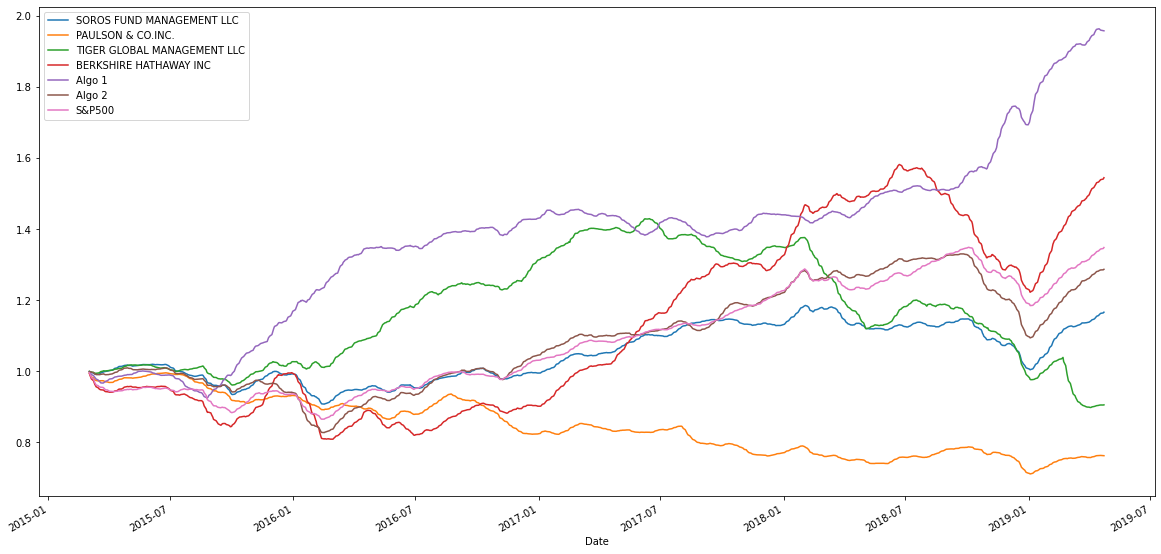

In [382]:
# Use `ewm` to calculate the rolling window
portfolio_ewm = portfolio.ewm(span = 21,adjust = False).mean()
(1+portfolio_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [383]:
# Annualized Sharpe Ratios
portfolio_sharpe = portfolio.mean()*252/(portfolio.std()*np.sqrt(252))
portfolio_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:>

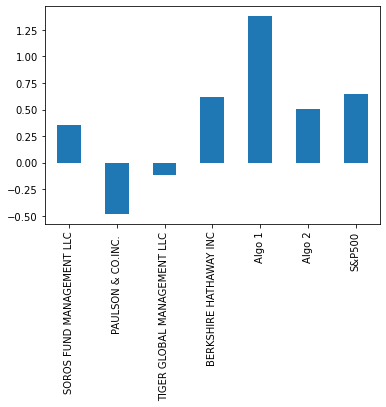

In [384]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

As clearly outlined in the above bar graph, both the Algo startegies outperform the S&P 500. As for the best startegy in the portfolio from a risk and return prospective will be Algo 1.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [385]:
# Reading data from 1st stock (Amazon)
amazon = r"C:\Users\aelri\Desktop\Pandas\Pandas-Whale-Analysis\Resources\amzn.csv"
amazon= pd.read_csv(amazon,index_col="Date", infer_datetime_format=True, parse_dates=True)
amazon.rename(columns={"Adj Close":"amzn"},inplace=True)
amazon.head()

,amzn
Date,
2018-02-01,1189.010010
2018-03-01,1204.199951
2018-04-01,1209.589966
2018-05-01,1229.140015
2018-08-01,1246.869995


In [386]:
# Reading data from 2nd stock(Walmart)
walmart = r"C:\Users\aelri\Desktop\Pandas\Pandas-Whale-Analysis\Resources\wmt.csv"
walmart= pd.read_csv(walmart,index_col="Date", infer_datetime_format=True, parse_dates=True)
walmart.rename(columns={"Adj Close":"wmt"},inplace=True)
walmart.head()

,wmt
Date,
2018-05-01,93.190575
2018-08-01,94.568008
2018-09-01,93.432549
2018-10-01,92.762451
2018-11-01,93.088188


In [387]:
# Reading data from 3rd stock(NVIDIA Corporation)
nvda = r"C:\Users\aelri\Desktop\Pandas\Pandas-Whale-Analysis\Resources\nvda.csv"
nvda= pd.read_csv(nvda,index_col="Date", infer_datetime_format=True, parse_dates=True)
nvda.rename(columns={"Adj Close":"nvda"},inplace=True)
nvda.head()


,nvda
Date,
2018-02-01,49.386852
2018-03-01,52.637188
2018-04-01,52.914654
2018-05-01,53.363060
2018-08-01,54.998142


In [388]:
# Combine all stocks in a single DataFrame
newportfolio=pd.concat([amazon,walmart,nvda],axis="columns",join="inner")
newportfolio.head()

,amzn,wmt,nvda
Date,,,
2018-05-01,1229.140015,93.190575,53.363060
2018-08-01,1246.869995,94.568008,54.998142
2018-09-01,1252.699951,93.432549,54.983288
2018-10-01,1254.329956,92.762451,55.414349
2018-11-01,1276.680054,93.088188,55.513447


In [389]:
# Reset Date index
newportfolio.index = newportfolio.index.normalize()
newportfolio.sort_index(inplace=True)
newportfolio.head()

,amzn,wmt,nvda
Date,,,
2018-01-02,1390.000000,98.207008,59.581329
2018-01-03,1493.449951,82.906380,57.563328
2018-01-05,1582.260010,81.837151,56.306499
2018-01-06,1641.540039,78.188438,63.901772
2018-01-08,1797.170044,83.134697,61.136059


In [390]:
# Calculate daily returns
dailyport=newportfolio.pct_change()
dailyport
# Drop NAs
dailyport.dropna(inplace=True)
# Display sample data
dailyport

,amzn,wmt,nvda
Date,,,
2018-01-03,0.074424,-0.155800,-0.033870
2018-01-05,0.059466,-0.012897,-0.021834
2018-01-06,0.037465,-0.044585,0.134892
2018-01-08,0.094807,0.063261,-0.043281
2018-01-10,0.115287,0.076023,0.174659
...,...,...,...
2019-11-01,-0.009455,-0.001264,0.024788
2019-11-02,-0.030209,0.014340,-0.015991
2019-11-03,0.050044,0.023701,0.101441


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [391]:
# Set weights
weights = [1/3, 1/3,1/3]

# Calculate portfolio return
portfolio_return=dailyport.dot(weights)
portfolio_return.dropna(inplace=True)

# Display sample data
portfolio_return.head()

Date
2018-01-03   -0.038415
2018-01-05    0.008245
2018-01-06    0.042591
2018-01-08    0.038262
2018-01-10    0.121990
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [392]:
# Join your returns DataFrame to the original returns DataFrame
portfolio["new_port"] = portfolio_return
portfolio.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,new_port
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,NaN
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,NaN
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,NaN
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,NaN
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,NaN


In [393]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio.dropna(inplace=True)
portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,new_port
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399,-0.038415
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034,0.008245
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662,0.038262
2018-01-10,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.001112,0.121990
2018-01-11,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.007034,-0.116604


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [394]:
# Calculate the annualized `std`
portfolio_std=pd.DataFrame(portfolio.std())
annualised_std=portfolio_std*np.sqrt(252)
annualised_std.rename(columns={0:"std"},inplace=True)
annualised_std

,std
SOROS FUND MANAGEMENT LLC,0.156530
PAULSON & CO.INC.,0.118587
TIGER GLOBAL MANAGEMENT LLC,0.228658
BERKSHIRE HATHAWAY INC,0.239160
Algo 1,0.127660
Algo 2,0.141962
S&P500,0.165531
new_port,0.857521


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

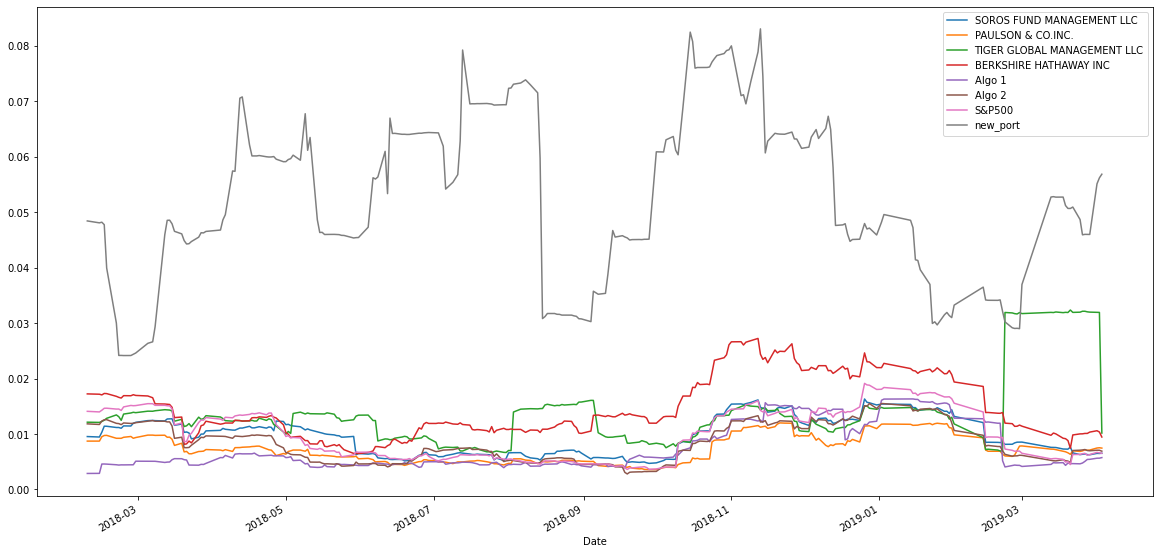

In [395]:
# Calculate rolling standard deviation
rolling_21 = portfolio.rolling(window = 21).std()

# Plot rolling standard deviation
rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

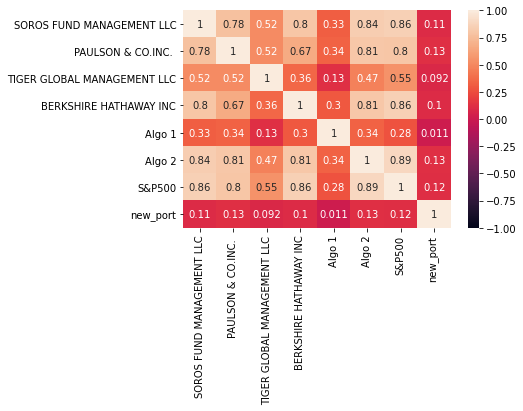

In [396]:
# Calculate and plot the correlation
correlation=portfolio.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation,vmin=-1, vmax=1,annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling Beta'}, xlabel='Date'>

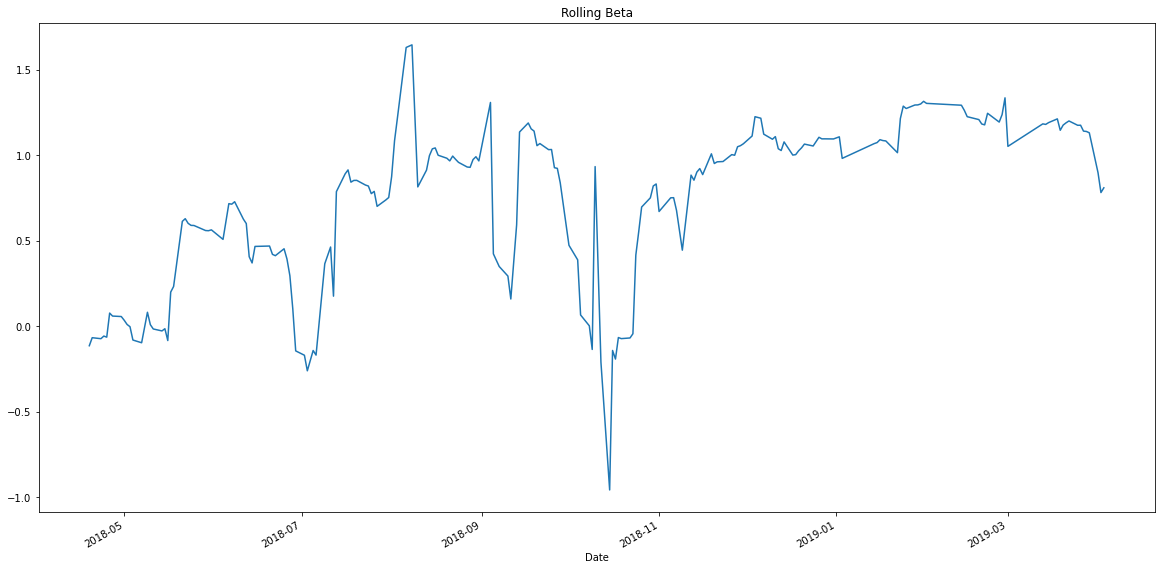

In [397]:
# Calculate and plot Beta
rolling_covariance = portfolio['new_port'].rolling(window=60).cov(portfolio['S&P500'])
rolling_variance = portfolio['S&P500'].rolling(window=60).var()
new_port60_beta=rolling_covariance/rolling_variance
new_port60_beta.plot(title = "Rolling Beta",figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [398]:
# Calculate Annualzied Sharpe Ratios
portfolio_sharpe = portfolio.mean()*252/(portfolio.std()*np.sqrt(252))
portfolio_sharpe

SOROS FUND MANAGEMENT LLC     -0.278579
PAULSON & CO.INC.             -0.770949
TIGER GLOBAL MANAGEMENT LLC   -1.503543
BERKSHIRE HATHAWAY INC        -0.060408
Algo 1                         1.800858
Algo 2                        -0.530308
S&P500                        -0.153330
new_port                       0.925940
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

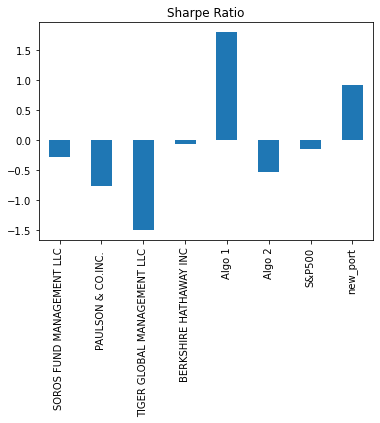

In [399]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe.plot(kind="bar",title = "Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

Based on the revised data set, my portfolio(new_port) was made up of Amazon, Walmart and Nvidia. As we can see from the correlation heatmap the new portfolio(based on allocated weights) is positively correlated to the S&P500. The rolling beta which measures the volatility to SP500 was high in the month of August 2018 and dropped sharply in the month of October. Based on the beta plot I can confirm the new portfolio composition is quite volatile as compared to SP500. If we take into account the sharpe ratio , the new portfolio return outperformed the market in the one year period but algo 1 portfolio outperformed all portfolios as a whole. All in all, the new portfolio even if it outperforms the market it needs to be optimised to reduce the level of risk and understand the highest possible return that can be acheived. 